In [1]:
import numpy as np

# Домашнее задание на повторение numpy
В задании все пункты необходимо выполнить с помощью numpy, без использования циклов/map/и тд! 

Задание выполняется __самостоятельно__. Категорически запрещено пользоваться чужими решениями заданий (даже смотреть их), в том числе, размещенными в открытых источниках (если таковые обнаружатся). При обнаружении списывания выставляется 0 за задание (в случае списывания у одногруппника/однокурскника - __ему/ей тоже__), а также подается докладная записка в учебный офис. Проверка на списывание проводится и автоматическими средствами, и вручную.

### История

В конце каждого семестра каждый семинарист сталкивается с необходимостью выставить студентам накопленную в семестре оценку. Часто семинаристы делают это с помощью Excel или GoogleSheets, но поверьте, с этим возникают проблемы. В задании вам надо помочь семинаристу некоторого курса выполнить эту непростую работу с помощью numpy :)

Выполните ячейку ниже, чтобы загрузить данные и визуально проверить корректность их считывания.

По строкам - студенты, по столбцам - их оценки. В курсе семинарист провел три проверочных (первые три колонки), выдал три домашних работы (следующие три колонки), кроме того, у студентов есть оценка за коллоквиум (последняя колонка).

In [2]:
marks = np.loadtxt("https://raw.githubusercontent.com/nadiinchi/iad2019/master/materials/data_hw1.txt")

In [3]:
marks[:3]

array([[ 7. ,  8. , 10. ,  0. ,  0. ,  2.1,  1.5],
       [ 0. ,  6. ,  4.4,  4. ,  0. ,  5. ,  4.3],
       [ 3. ,  7. ,  8.7,  7.6,  7. ,  9.7, 10. ]])

### Число студентов (0.5 балла)
Сколько студентов в группе семинариста?

In [4]:
# Записать ответ в переменную num_studs
num_studs = marks.shape[0]

In [5]:
print(num_studs)

28


### Очень сложная проверочная, или просто добрый семинарист (1.25 балла)
Семинарист помнит, что первая проверочная получилась очень сложной, и максимальный балл в группе был далеко не 10. Поэтому он решил перенормировать баллы за эту проверочную на максимум по группе (поделить на максимум и умножить на 10) - чтобы у студента с максимальной оценкой получилось 10, а у остальных - просто оценка больше.

Каков максимальный балл за первую проверочную?

In [6]:
# Записать ответ в переменную max_mark

num = 0 #первая проверочная
max_mark = np.max(marks, axis=0)[num]

In [7]:
print(max_mark)

7.0


Разделите первый столбец на max_mark (для этого надо выделить столбец, поставить после соответствующего выражения знак = и присвоить новое значение столбца)

In [8]:
marks[:, num] = marks[:, num] / max_mark * 10

Снова вычислите максимальный балл за первую проверочную (теперь он должен быть равен 10):

In [9]:
max_mark_new = np.max(marks, axis=0)[num]
print(max_mark_new)

10.0


### Подсчет накопленной оценки (1.25 балла)
Для вычисления накопленной надо посчитать средние оценки за проверочные для каждого студента и средние за домашние работы (может пригодиться np.mean). Накопленная оценка есть 0.3\*Проверочные + 0.4\*Домашние + 0.3\*Коллоквиум. Вычислите накопленные оценки и добавьте их в последний столбец матрицы (нужно добавить еще один новый столбец).

In [10]:
# Веса следует брать из переменной weights, а не вписывать вручную
# Используйте np.dot
weights = [0.3, 0.4, 0.3]

#Будут умножаться матрицы размеров (28, 3) и (3, 1) = (28, 1)

In [11]:
#Готовлю столбцы для матрицы со средними 
test_mean = np.mean(marks[:, :3], axis=1)
hw_mean = np.mean(marks[:, 3:6], axis=1)
col_mark = marks[:, 6]

In [12]:
marks_means = np.vstack((test_mean, hw_mean, col_mark)).T
marks_means.shape # Матрица для расчета накполеннной

(28, 3)

In [13]:
pre_finals = np.dot(marks_means, weights) # Вычисляю накопленные оценки

In [14]:
marks = np.append(marks, pre_finals.reshape(num_studs, 1), axis=1) # Добавляю столбец с накопленными оценками в общую таблицу
marks.shape

(28, 8)

In [15]:
marks[:3] #Накопленные на месте

array([[10.        ,  8.        , 10.        ,  0.        ,  0.        ,
         2.1       ,  1.5       ,  3.53      ],
       [ 0.        ,  6.        ,  4.4       ,  4.        ,  0.        ,
         5.        ,  4.3       ,  3.53      ],
       [ 4.28571429,  7.        ,  8.7       ,  7.6       ,  7.        ,
         9.7       , 10.        ,  8.23857143]])

### Студенты, которых, вероятно, отчислят (1.25 балла)

Сколько в группе студентов с накопленной оценкой 0? Вам может понадобиться тот факт, что применение np.sum к бинарному вектору дает число значений True в нем, например:

In [16]:
np.sum([True, False, True]) # 2 значения True

2

Также обратим внимание на операцию поэлементного сравнения, возвращающую массив из True и False:

In [17]:
a = np.array([1, 2, 3])
b = np.array([2, 3, 3])
print(a == b)
print(a > b)

[False False  True]
[False False False]


In [18]:
zero_pre_finals = np.zeros((num_studs))
prob_exp_num = np.sum(pre_finals == zero_pre_finals)

In [19]:
print(prob_exp_num) # Итого трое кандидатов на отчисление

3


### Студенты, которые получат автоматы (1.25 балла)
Автомат получат студенты, у которых накопленная оценка больше 7. Добавьте еще один столбец - в нем стоит 1, если студент получает автомат, и 0 иначе.

In [20]:
auto = np.zeros((num_studs))
auto[pre_finals > 7.0] = 1

In [21]:
marks = np.append(marks, auto.reshape(num_studs, 1), axis=1) # Добавляю столбец с данными по автомату

In [22]:
marks[:3] #Данные по автомату появились в таблице с оценками

array([[10.        ,  8.        , 10.        ,  0.        ,  0.        ,
         2.1       ,  1.5       ,  3.53      ,  0.        ],
       [ 0.        ,  6.        ,  4.4       ,  4.        ,  0.        ,
         5.        ,  4.3       ,  3.53      ,  0.        ],
       [ 4.28571429,  7.        ,  8.7       ,  7.6       ,  7.        ,
         9.7       , 10.        ,  8.23857143,  1.        ]])

### Студенты, которые будут освобождены от задач на экзамене (1.25 балла)
Семинарист решил, что первая половина группы в рейтинге по накопленной оценке будет освобождена от решения задач на экзамене. Выделите этих студентов в отдельный массив. Для этого надо отсортировать строки массива (np.argsort) и взять первую половину.

In [23]:
marks_sorted = marks[np.argsort(marks[:, -2])]
top_studs = marks_sorted[num_studs//2:]

In [24]:
print(top_studs)

[[ 4.28571429  7.          8.7         7.6         7.          9.7
  10.          8.23857143  1.        ]
 [ 8.57142857 10.         10.          9.7         7.         10.
   7.          8.51714286  1.        ]
 [ 0.          8.7         8.          9.7        10.          9.5
  10.          8.56333333  1.        ]
 [ 7.14285714 10.          9.          7.          7.9        10.
   9.          8.63428571  1.        ]
 [ 8.57142857  5.         10.          9.7        10.         10.
   8.          8.71714286  1.        ]
 [ 5.          9.3        10.          9.9        10.         10.
   8.          8.81666667  1.        ]
 [ 8.57142857 10.          9.7         8.7         7.          8.5
   9.7         8.96380952  1.        ]
 [ 4.28571429  8.7        10.          9.4        10.7        10.
   9.          9.01190476  1.        ]
 [10.         10.         10.          9.          9.5        10.
   8.          9.2         1.        ]
 [ 5.71428571 10.         10.          9.9         9

### Сложность заданий (1.25 балла)
После выставления оценок семинаристу нужно решить, как усовершнествовать курс в будущем году. Семинарист хочет оценить сложность заданий, проверочных и коллоквиума по своей особой системе. Он присвоил каждому студенту вес (веса суммируются в 1) и хочет посчитать для каждого задания, проверочной и коллоквиума среднюю оценку с весами.
Пример, что имеется в виду: если есть 4 студента с весами [0.1, 0.2, 0.3, 0.4] и оценками [3, 7, 9, 10], то средняя оценка за задание с весами получится 

In [25]:
0.1 * 3 + 0.2 * 7 + 0.3 * 9 + 0.4 * 10 

8.4

Веса:

In [26]:
weights = np.array([1.]*7+[2.]*4+[3.]*7+[4.]*(marks.shape[0]-18))
# разделите веса на их сумму, чтобы они суммировались к 1
weights = weights/np.sum(weights)

In [27]:
#np.sum(weights)

Посчитайте указанным образом сложность каждого "столбца".

In [28]:
weighted_marks = marks[:, :-2] * weights.reshape(num_studs, 1)
weighted_means = np.sum(weighted_marks, axis=0)

In [29]:
print(weighted_means) #Средние взвешенные баллы за каждую работу

[4.90037594 7.11973684 7.85789474 6.16447368 4.83289474 5.87894737
 4.87368421]


### Визуализация данных (2=1.5+0.5 балла)
Наконец, семинарист решил визуализировать оценки. Постройте три точечных графика (scatter plot): на каждом по оси y будет накопленная оценка студента (вы рассчитали ее выше), а по оси x на одном графике средняя оценка за проверочные, на втором - за домашние работы, на третьем - за коллоквиум. Обязательно подпишите графики и оси!

In [30]:
from matplotlib import pyplot as plt
%matplotlib inline
# другие библиотеки использовать нельзя

Text(0.5, 1.0, 'Scatter plot for pre-final marks')

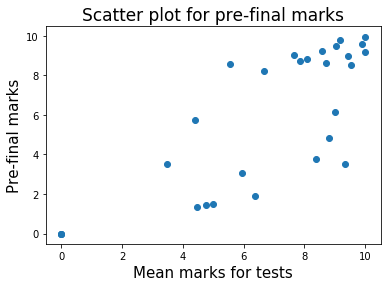

In [31]:
plt.scatter(test_mean, pre_finals)
plt.xlabel("Mean marks for tests", fontsize=15)
plt.ylabel("Pre-final marks", fontsize=15)
plt.title("Scatter plot for pre-final marks", fontsize=17)

Text(0.5, 1.0, 'Scatter plot for pre-final marks')

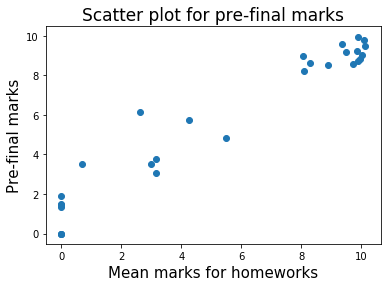

In [32]:
plt.scatter(hw_mean, pre_finals)
plt.xlabel("Mean marks for homeworks", fontsize=15)
plt.ylabel("Pre-final marks", fontsize=15)
plt.title("Scatter plot for pre-final marks", fontsize=17)

Text(0.5, 1.0, 'Scatter plot for pre-final marks')

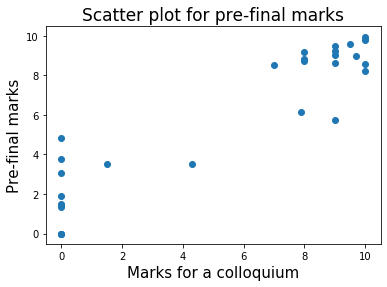

In [33]:
plt.scatter(col_mark, pre_finals)
plt.xlabel("Marks for a colloquium", fontsize=15)
plt.ylabel("Pre-final marks", fontsize=15)
plt.title("Scatter plot for pre-final marks", fontsize=17)

На отдельном графике визуализируйте отсортированные накопленные оценки: отсортруйте столбец с помощью функции np.sort, разверните слева направо (чтобы оценки оказались отсортированы по убыванию) и визуализируйте его с помощью функции plt.plot. Вновь не забудьте подписать оси!

In [34]:
p_f_sorted = np.sort(pre_finals)[::-1]

Text(0.5, 1.0, 'Plot for pre-final marks')

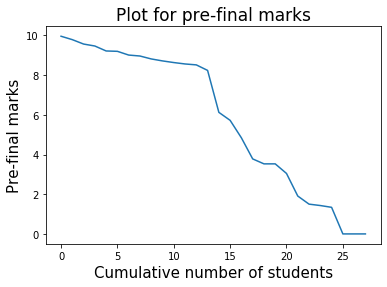

In [35]:
plt.plot(p_f_sorted)
plt.xlabel("Cumulative number of students", fontsize=15)
plt.ylabel("Pre-final marks", fontsize=15)
plt.title("Plot for pre-final marks", fontsize=17)